<a href="https://colab.research.google.com/github/Aniketaugustya/Projects/blob/main/opencv_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

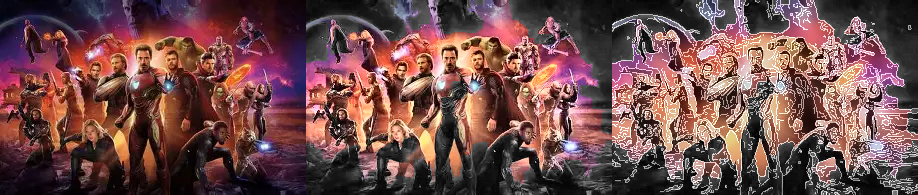

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ------------------ CLAHE Function ------------------
def apply_clahe_bgr(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l2 = clahe.apply(l)
    lab2 = cv2.merge((l2, a, b))
    return cv2.cvtColor(lab2, cv2.COLOR_LAB2BGR)

# ------------------ Main Pipeline ------------------
def artistic_subject_highlight(image_path):
    # Step 1: Read + Enhance Contrast
    img = cv2.imread("/content/Avenger2.webp")
    original = img.copy()
    enhanced = apply_clahe_bgr(img)

    # Step 2: Create mask of largest subject
    gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Morphology cleanup
    kernel = np.ones((5,5), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find largest contour
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [largest], -1, 255, -1)

    # Step 3: Subject color, background grayscale
    subject = cv2.bitwise_and(enhanced, enhanced, mask=mask)
    background = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
    inv_mask = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(background, background, mask=inv_mask)
    combined = cv2.add(subject, background)

    # Step 4: Smooth subject only (bilateral filter)
    smooth_subject = cv2.bilateralFilter(subject, d=15, sigmaColor=75, sigmaSpace=75)
    smoothed = cv2.add(smooth_subject, background)

    # Step 5: Stylized edges (Canny)
    edges = cv2.Canny(combined, 100, 200)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    final = cv2.addWeighted(smoothed, 0.9, edges_colored, 0.5, 0)

    # Step 6: Side-by-side comparison
    stacked = np.hstack((original, combined, final))

    return stacked

# ------------------ Run ------------------
if __name__ == "__main__":
    output = artistic_subject_highlight("your_image.jpg")
    cv2.imwrite("result_pipeline.jpg", output)
    cv2_imshow(output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

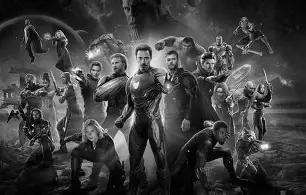

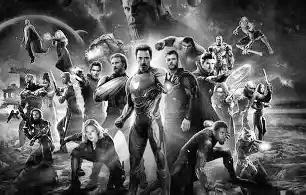

In [7]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image in grayscale
image = cv2.imread('/content/Avenger2.webp', cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object (clipLimit and tileGridSize can be adjusted)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
enhanced_image = clahe.apply(image)

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(enhanced_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()